In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf

In [2]:
volcanoes = os.listdir("data")

# Creating plots that show TIR max time series and associated autocorrelations

In addition to the autocorrelations, explicitly retrieving the number consecutively significant lags - for the sake of NN design

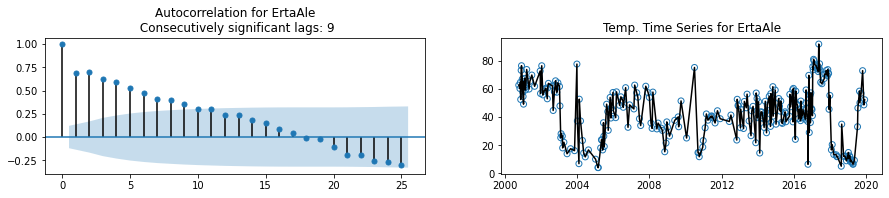

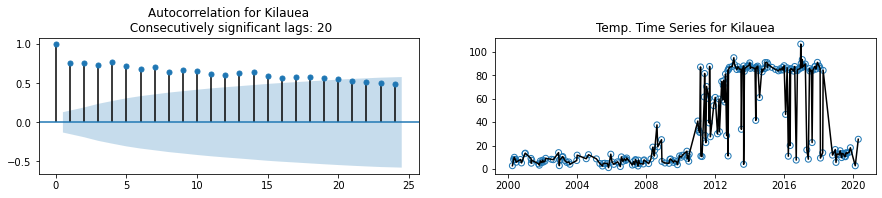

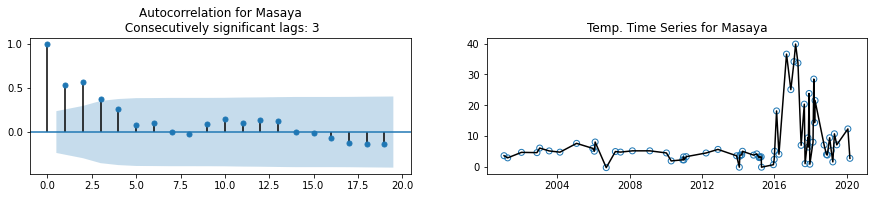

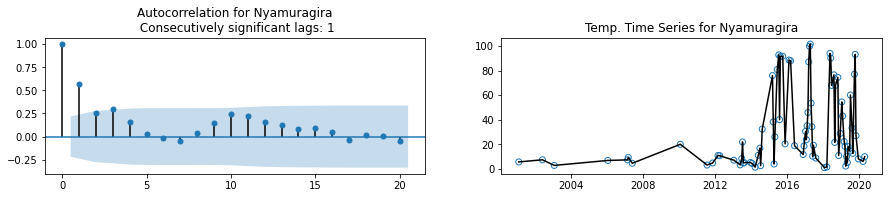

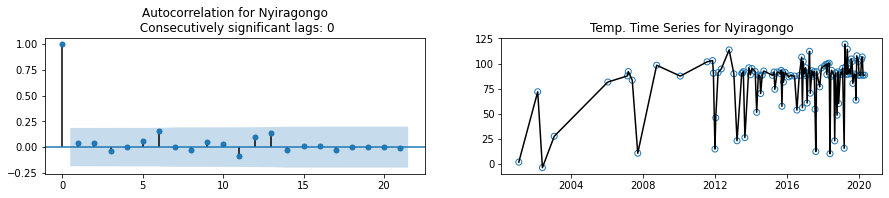

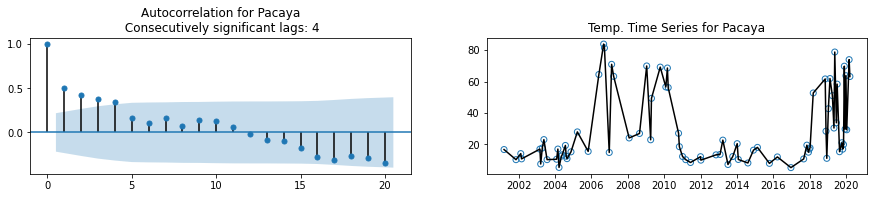

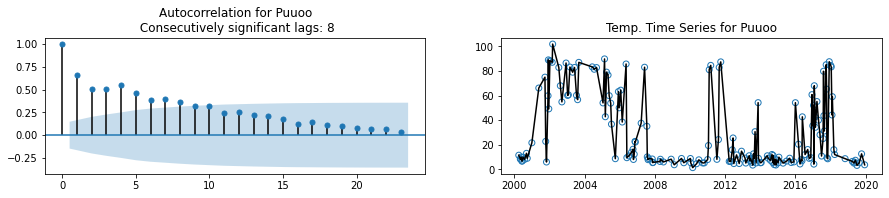

In [3]:
# Creating empty array to store ACF (autocorrelation) values and their confidence intervals
consecutive_signif_lags = []
for volcano in volcanoes:
    # Import data
    df = pd.read_csv("data/" + volcano + "/good_df.csv")
    # Formatting dates
    dates = [datetime.strptime(date, '%Y-%m-%d') for date in df['dates']]
    # Setting up plot parameters
    f, axarr = plt.subplots(1,2)
    f.set_figheight(2.5)
    f.set_figwidth(15)
    # Computing autocorr and confidence intervals
    acf_vals, confid_interv = acf(df['T_above_back'], nlags = 25, fft = False, alpha = 0.05)
    # Printing last signif lag in title
    for lag in range(25):
        conf_min, conf_max = confid_interv[lag]
        if (conf_min <= 0) and (conf_max >= 0):
            last_signif_lag = lag - 1
            break
    # Plotting autocorrelation
    vol_acf = plot_acf(df['T_above_back'], ax = axarr[0], 
                       title = 'Autocorrelation for ' + volcano + \
                       '\n Consecutively significant lags: ' + str(last_signif_lag))
    # Plotting time series
    axarr[1].scatter(dates, df['T_above_back'], marker = 'o', color = 'none', edgecolor = '#1f77b4')
    axarr[1].plot(dates, df['T_above_back'], color = 'black')
    axarr[1].set_title('Temp. Time Series for ' + volcano)
    # Storing number of significant lags for eahc
    consecutive_signif_lags.append(last_signif_lag)

In [4]:
import numpy as np
np.mean(consecutive_signif_lags)

6.428571428571429

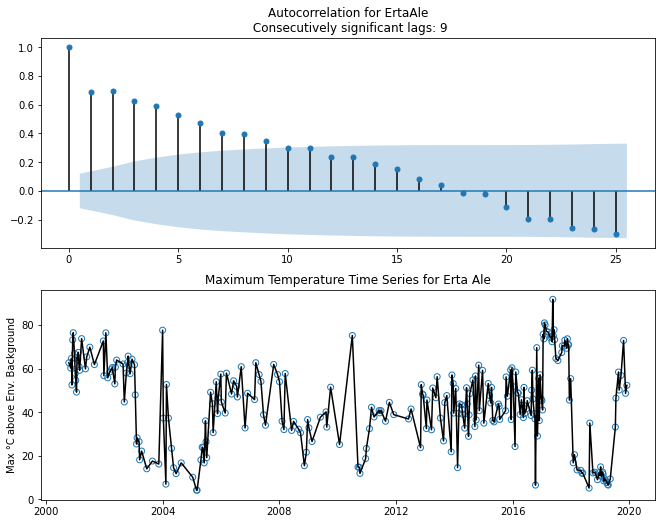

In [24]:
    volcano = 'ErtaAle'
    # Import data
    df = pd.read_csv("data/" + volcano + "/good_df.csv")
    # Formatting dates
    dates = [datetime.strptime(date, '%Y-%m-%d') for date in df['dates']]
    # Setting up plot parameters
    f, axarr = plt.subplots(2,1)
    f.set_figheight(8.5)
    f.set_figwidth(11)
    # Computing autocorr and confidence intervals
    acf_vals, confid_interv = acf(df['T_above_back'], nlags = 25, fft = False, alpha = 0.05)
    # Printing last signif lag in title
    for lag in range(25):
        conf_min, conf_max = confid_interv[lag]
        if (conf_min <= 0) and (conf_max >= 0):
            last_signif_lag = lag - 1
            break
    # Plotting autocorrelation
    vol_acf = plot_acf(df['T_above_back'], ax = axarr[0], 
                       title = 'Autocorrelation for ' + volcano + \
                       '\n Consecutively significant lags: ' + str(last_signif_lag))
    # Plotting time series
    axarr[1].scatter(dates, df['T_above_back'], marker = 'o', color = 'none', edgecolor = '#1f77b4')
    axarr[1].plot(dates, df['T_above_back'], color = 'black')
    axarr[1].set_title('Maximum Temperature Time Series for Erta Ale')
    axarr[1].set_ylabel('Max °C above Env. Background')
    plt.savefig('ErtaAle.png')